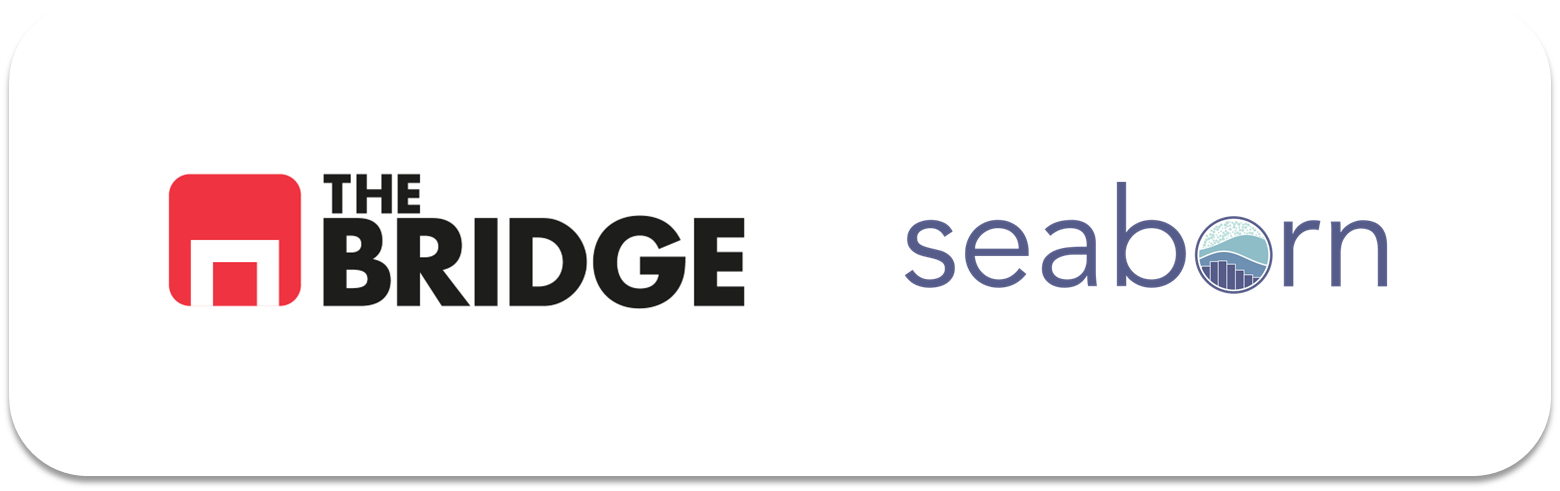

# Visualización Aplicada: Categórica y numérica

Sin más, a por los imports los datos y empezamos:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

df_titanic = pd.read_csv("./data/titanic.csv")
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")

### Gráficos y consideraciones

Vamosa  ver, en general, comparación de distribuciones o evoluciones por valor de la variable categóricas:
- Comparación de diagramas de caja
- Comparación de histrogramas y fuciones de densidad
- Comparación con agregaciones de la numérica: Treemaps

* **Cuándo**: 
    1. En análisis bivariantes todos son útiles, pero alguno repetitivo y si la cardinalidad de la variable categórica es alta comparar histogramas se hace casi imposibe, en ese caso utilizar sólo comparación de cajas. Si se trata de variables de una serie o evolución temporal siempre comparar líneas. 
    2. En presentaciones (para información no temporal o series) siempre recordar la maxima de no abrumar con información (los árboles no dejarán ver el bosque). Cuando tenemos tanta información visual posible siempre debe ser un acompañamiento de refuerzo o estético visual al mensaje que queramos dar (es decir que usemos  ejes sencillos, no poner datos númericos salvo los relevantes, que se vea claramente que grafica es cual). Si estamos comparando formas o líneas, por ejemplo, usar mejor KDE que histograma, marcar las regiones que queremos resaltar como parecidas o diferentes. 
    3. En presentación de datos que son evoluciones temporales en cambio estas visualizaciones ayudan bastante y rigen los mismos principios: no abrumar con números o textos, marcar las regiones o puntos realmente informativos para el mensaje que se quiere dar. 
  

  
* **Cuándo no**: En presentaciones, en general, NO USAR HISTOGRAMAS (salvo que el público lo demande) son muchas barras :-), NI DIAGRAMAS DE CAJAS, si tienes que poner una "caja": usa Violines. Los treemap son muy visuales pero son una variante del mapa de calor, así que escoge bien el patrón de colores, destaca el dato que refuerce tu mensaje, no abrumes con textos y números (sólo lo relevante, salvo que te lo hayan pedido)

* **Genérico**: Además si las variables tienen cardinalidades altas, en presentación también aplica lo que ya dijimos crear categorías otros para poner allí las categorias no relevantes de una y otra variable (si es necesario no mostrarla)

### Comparación de diagramas de "Caja" y dispersión:


Recordemos como obtener las medidas de tendencias central y de posición:

In [2]:
variable_categorica = "aircompany"
variable_numerica = "ingresos"
df_viajes.groupby(variable_categorica, as_index = False)[variable_numerica].describe()

,aircompany,count,mean,std,min,25%,50%,75%,max
0,Airnar,100.0,405293.978200,269583.848420,14232.65,185270.6000,396764.220,608356.1225,958617.02
1,FlyQ,108.0,401619.008056,295633.712828,23498.34,237556.9525,366970.685,473901.4325,1081702.91
2,MoldaviAir,133.0,548077.209098,374577.838426,11797.85,178872.9000,532426.220,794055.4100,1295515.83
3,PamPangea,117.0,478417.048718,364458.092328,12383.21,163124.5300,442668.520,763079.0200,1083591.01
4,TabarAir,142.0,271042.230282,177006.035877,24289.53,95620.5075,258379.745,398147.1925,623089.41


Comparación de diagramas de dispersión según la variable categórica

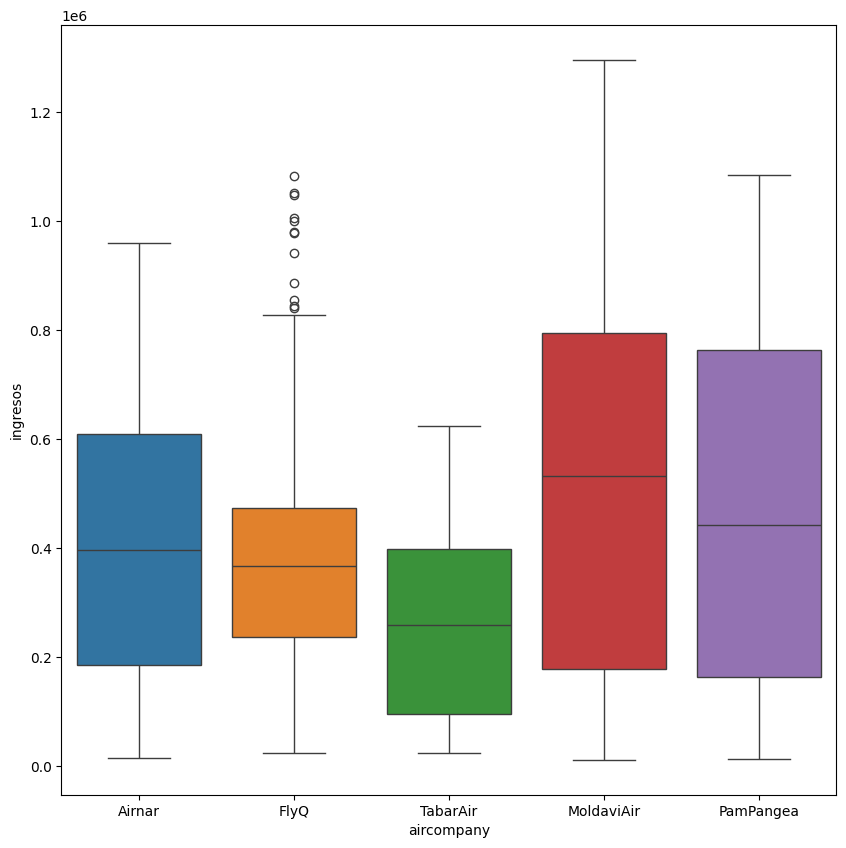

In [3]:
plt.figure(figsize=(10,10))
sns.boxplot(x = "aircompany",
            y = "ingresos",
            hue = "aircompany",
            data=df_viajes);

### Comparación de histrogramas y funciones de densidad:


Cambiamos a clase y precio del billete en el dataset del Titanic:

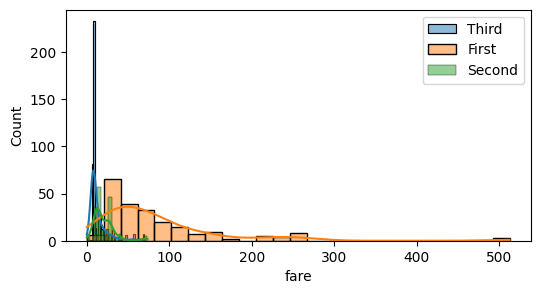

In [4]:
# Añadiremos los diagramas a la misma figura creando uno a uno y aprovechando que así funciona matplotlib
variable_categorica = "class"
variable_numerica = "fare"

plt.figure(figsize=(6,3))
for valor in df_titanic[variable_categorica].unique():  
    sns.histplot(df_titanic.loc[df_titanic[variable_categorica] == valor,variable_numerica], kde= True, label=valor)
plt.legend();

### Comparación categorizando: Los treemaps

El diagrama tipo treemap nos permite visualizar en forma de mapa (ahora lo veremos) la relación entre una variable categórica y una variable numérica, es bastante visual, pero nos salimos eventualmente de seaborn y trabajamos con `squarify`. Y es interesante para comparar agregaciones de valores (es decir la media de las variables numéricas, sus máximos, sus agregados...)

Vamos a obtener el treemap de "aircompany", comparando sus ingresos totales y sus consumos:

C:\Users\Martín Ámez Segovia\AppData\Local\Temp\ipykernel_18672\2444967317.py:9: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})


(0.0, 100.0, 0.0, 100.0)

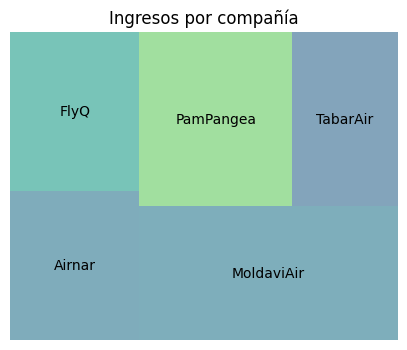

In [5]:
import squarify # Primero importamos squarify

# Obtenemos los datos, haciendo la agregación que queramos:

variable_categorica = "aircompany"
variable_numerica = "ingresos"
operacion_agregacion = sum

datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Ingresos por compañía")
plt.axis("off")

Aplican las mismas sugerencias y guías que para los mapas de calor... 

(0.0, 100.0, 0.0, 100.0)

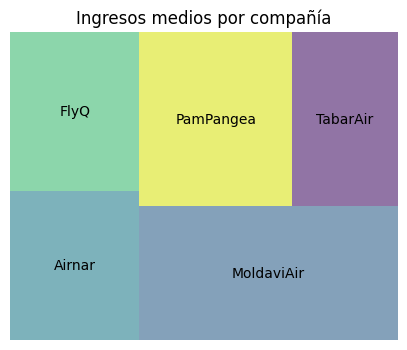

In [9]:
import squarify # Primero importamos squarify

# Obtenemos los datos, haciendo la agregación que queramos:

variable_categorica = "aircompany"
variable_numerica = "ingresos"
operacion_agregacion = "sum"

datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Ingresos medios por compañía")
plt.axis("off")

(0.0, 100.0, 0.0, 100.0)

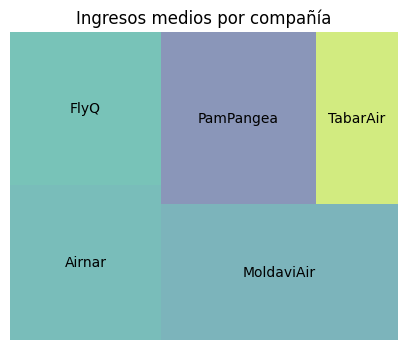

In [12]:
import squarify # Primero importamos squarify

# Obtenemos los datos, haciendo la agregación que queramos:

variable_categorica = "aircompany"
variable_numerica = "consumo_kg"
operacion_agregacion = "mean"

datos = df_viajes.groupby(variable_categorica, as_index = False).agg({variable_numerica: operacion_agregacion})

plt.figure(figsize = (5,4))
squarify.plot(sizes = datos[variable_numerica], label = datos[variable_categorica], alpha = 0.6)
plt.title("Ingresos medios por compañía")
plt.axis("off")